# Очистка данных

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('PRODUCT_LIST1.CSV',sep=";", header=0, index_col="Product_code")

In [2]:
df.head()

,Product_name,Unnamed: 2,Unnamed: 3
Product_code,,,
821001,Кофе ЭСПРЕССО 30 мл,NaN,NaN
821002,Кофе ДОППИО 60мл,NaN,NaN
821003,Кофе РИСТРЕТТО 20 мл,NaN,NaN
821004,Фильтр кофе Верньяно250мл,NaN,NaN
821005,Кофе ЛУНГО 50 мл,NaN,NaN


## Разбираемся с Unnamed колонками

In [3]:
df = df.rename(columns = {'Unnamed: 2': 'U2', 'Unnamed: 3': 'U3'})

In [4]:
df.columns

Index(['Product_name', 'U2', 'U3'], dtype='object')

In [5]:
df.U2.unique()

array([nan, 'манго'], dtype=object)

In [6]:
df.U3.unique()

array([nan, '5%', '6%', '75л', '33', '5', '5 см'], dtype=object)

In [7]:
df.describe()

,Product_name,U2,U3
count,9786,1,7
unique,9563,1,6
top,Не использовать,манго,5
freq,6,1,2


In [8]:
df=df.drop(columns={'U2', 'U3'})

In [9]:
df=df.drop(df.loc[df['Product_name'] == 'Не использовать'].index, inplace=False)

In [10]:
df=df.drop_duplicates()

In [11]:
df.describe()

,Product_name
count,9562
unique,9562
top,Ethiopia Lekempti
freq,1


In [12]:
df.index.names = ["product_code"]


In [13]:
df.loc[824021]

Product_name    Чай красный фрукт 270мл
Name: 824021, dtype: object

# Добавляем параметры

In [14]:
df[df["Product_name"].str.contains("Кофе ")]

,Product_name
product_code,
821001,Кофе ЭСПРЕССО 30 мл
821002,Кофе ДОППИО 60мл
821003,Кофе РИСТРЕТТО 20 мл
821005,Кофе ЛУНГО 50 мл
821007,Кофе КОРЕТТО 35 мл
...,...
822109,Раф Кофе 250мл
822152,Раф Кофе 350мл Персонал
872006,Кофе 200мл Д/Л


## Фильтр для напитков (фильтруем по единицам измерения)

In [15]:
drinks = df[df["Product_name"].str.contains("[0-9]+мл")]

In [16]:
drinksWOcofee=drinks.drop(drinks.loc[drinks['Product_name'].str.contains('кофе ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Кофе ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('АФФОГАТО ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Латте ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('латте')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Латте/')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Макиато ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Коретто/')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Коретто ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Эспрессо')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Лунго ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Ристретто ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Френч пресс')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Френс пресс')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Ф.П.')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Френч Пресс')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Фильтр ')].index, inplace=False)

drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Лу ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Ай ')].index, inplace=False)

drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Сёчу')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('сёчу')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Сёчу/')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Саке ')].index, inplace=False)
drinksWOcofee=drinksWOcofee.drop(drinksWOcofee.loc[drinksWOcofee['Product_name'].str.contains('Саке/')].index, inplace=False)

In [17]:
coffeeTab = drinks.loc[drinks['Product_name'].str.contains('Кофе')]
coffeelist = ['кофе ', 'Кофе ', "Эспрессо", "Френч пресс", "Френс пресс", "Френч Пресс", "Фильтр"]
temp = drinks.loc[drinks['Product_name'].str.contains('Френс пресс')]
coffeeTab = coffeeTab.append(temp)

In [18]:
coffeelist = ['кофе ', 'Кофе ', "Эспрессо", "Френч пресс", "Френс пресс", "Френч Пресс", "Фильтр"]

In [19]:
temp = drinks.loc[drinks['Product_name'].str.contains('Френс пресс')]

In [20]:
coffeeTab = coffeeTab.append(temp)

In [21]:
coffeeTab

,Product_name
product_code,
821002,Кофе ДОППИО 60мл
821008,Кофе Эспрессо Романо50мл
821012,Кофе АМЕРИКАНО 90мл
821014,Кофе Мокко 70мл
821120,Кофе Мокко 60мл
821142,Кофе Колада 270мл
821167,Кофе по Алжирски 120мл
821170,Айриш Кофе 150мл
821172,Кофе по-тайски NEW 250мл


In [22]:
tea = df[df["Product_name"].str.contains("Чай ")]

In [23]:
tea

,Product_name
product_code,
824001,Чай Ассам 300мл
824003,Чай У Лун Се Чунг300
824004,Чай зел.с жасм. 300
824006,Чай Кокей ча 300мл
824007,Чай Лапсанг Сучонг300
...,...
849011,Завтрак Чай зел/Яичница
849012,Завтрак Чай зел/омлет
849013,Завтрак Чай зел/каша


## Фильтр для супов

In [24]:
df[df["Product_name"].str.contains(" суп ")]

,Product_name
product_code,
847003,Сырный суп 250г
847017,Луковый суп 250г
847073,Дим Сам суп 300г
847077,Тай суп с креветками 250г
847092,Бессарабский суп 300г
847094,Льежский суп с ф/г 250г
847098,Калабрийск летн суп 300г
847103,Калабрий зимний суп 300Г
847106,Тыквенный суп 300г


In [25]:
df[df["Product_name"].str.contains("Суп ")]

,Product_name
product_code,
847001,Суп луковый 230г
847002,Суп пюре Море/Окиян 270г
847020,Суп грибной 250г
847022,Суп Монсун 250г
847023,Суп Френч-карри 250г
...,...
876011,Суп фасолевый 300г Д/С
876014,Суп Венгерский 300 Д/С
876015,Суп овощной 300г Д/С


# Разберёмся с продажами

In [26]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на Ваш вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

## SALES table

In [27]:
sales = pd.read_csv('SALE_LIST.csv',sep=";")

In [28]:
sales

,date,product_code,rest_code,product_count
0,06.01.2009,824021,Озерный,4
1,06.01.2009,824068,Озерный,1
2,06.01.2009,824070,Озерный,2
3,06.01.2009,824073,Озерный,1
4,06.01.2009,824074,Озерный,1
...,...,...,...,...
135915,26.05.2013,892545,Мечта,3
135916,27.05.2013,892545,Мечта,1
135917,28.05.2013,892545,Мечта,3
135918,29.05.2013,892545,Мечта,4


In [29]:
sales.dtypes

date             object
product_code      int64
rest_code        object
product_count     int64
dtype: object

In [30]:
sales.describe(include='all')

,date,product_code,rest_code,product_count
count,135920,135920.000000,135920,135920.000000
unique,1826,NaN,2,NaN
top,20.09.2012,NaN,Мечта,NaN
freq,101,NaN,73690,NaN
mean,NaN,839804.895917,NaN,11.376663
std,NaN,28968.345316,NaN,18.153321
min,NaN,821001.000000,NaN,-6.000000
25%,NaN,822006.000000,NaN,2.000000
50%,NaN,824074.000000,NaN,5.000000
75%,NaN,862094.000000,NaN,12.000000


In [31]:
sales = sales[sales["product_count"]>=0]

In [32]:
sales.describe(include='all')

,date,product_code,rest_code,product_count
count,135544,135544.000000,135544,135544.000000
unique,1826,NaN,2,NaN
top,20.09.2012,NaN,Мечта,NaN
freq,100,NaN,73381,NaN
mean,NaN,839816.331464,NaN,11.411881
std,NaN,28972.696099,NaN,18.166105
min,NaN,821001.000000,NaN,1.000000
25%,NaN,822006.000000,NaN,2.000000
50%,NaN,824074.000000,NaN,5.000000
75%,NaN,862094.000000,NaN,12.000000


In [33]:
sales = sales.join(df, on='product_code', how='left')


In [34]:
sales.describe(include='all')

,date,product_code,rest_code,product_count,Product_name
count,135544,135544.000000,135544,135544.000000,135544
unique,1826,NaN,2,NaN,110
top,20.09.2012,NaN,Мечта,NaN,Кофе Латте 300мл
freq,100,NaN,73381,NaN,6623
mean,NaN,839816.331464,NaN,11.411881,NaN
std,NaN,28972.696099,NaN,18.166105,NaN
min,NaN,821001.000000,NaN,1.000000,NaN
25%,NaN,822006.000000,NaN,2.000000,NaN
50%,NaN,824074.000000,NaN,5.000000,NaN
75%,NaN,862094.000000,NaN,12.000000,NaN


Text(0.5, 0.98, '')

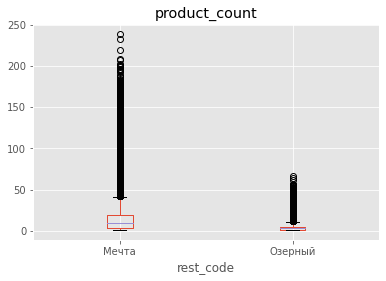

In [35]:
ax = sales.boxplot(column='product_count', by='rest_code')
ax.get_figure().suptitle('')

rest_code
Мечта      AxesSubplot(0.125,0.125;0.775x0.755)
Озерный    AxesSubplot(0.125,0.125;0.775x0.755)
Name: product_count, dtype: object

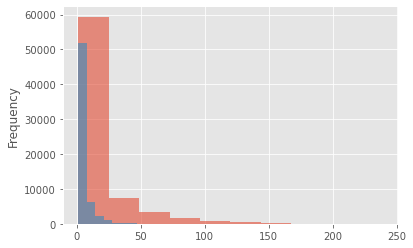

In [46]:
sales.groupby('rest_code')['product_count'].plot.hist(alpha=0.6)

## Кофе анализ

In [36]:
coffeeTab = sales.loc[sales['Product_name'].str.contains('Кофе')]
coffeelist = ['кофе ', "Эспрессо", "Френч пресс", "Френс пресс", "Френч Пресс", "Фильтр"]
for cofees in coffeelist:
    temp = sales.loc[sales['Product_name'].str.contains(f'{cofees}')]
    coffeeTab = coffeeTab.append(temp)

In [37]:
coffeeTab

,date,product_code,rest_code,product_count,Product_name
50454,06.01.2009,821001,Озерный,7,Кофе ЭСПРЕССО 30 мл
50455,06.01.2009,821002,Озерный,4,Кофе ДОППИО 60мл
50456,06.01.2009,821005,Озерный,2,Кофе ЛУНГО 50 мл
50457,06.01.2009,821012,Озерный,8,Кофе АМЕРИКАНО 90мл
50458,06.01.2009,821170,Озерный,2,Айриш Кофе 150мл
...,...,...,...,...,...
84290,15.07.2010,821281,Мечта,22,Фильтр кофе 230мл
84307,16.07.2010,821214,Мечта,1,Фильтр-кофе с собой 300мл
84309,16.07.2010,821281,Мечта,17,Фильтр кофе 230мл
84325,17.07.2010,821214,Мечта,1,Фильтр-кофе с собой 300мл


Text(0.5, 0.98, '')

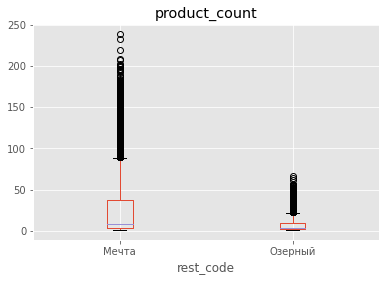

In [38]:
ay = coffeeTab.boxplot(column='product_count', by='rest_code')
ay.get_figure().suptitle('')

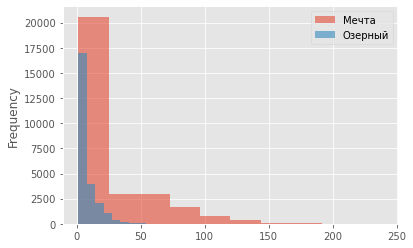

In [39]:
coffeeTab.groupby('rest_code')['product_count'].plot.hist(alpha=0.6)
# Добавляем легенду
plt.legend();

rest_code
Мечта      AxesSubplot(0.125,0.125;0.775x0.755)
Озерный    AxesSubplot(0.125,0.125;0.775x0.755)
Name: product_count, dtype: object

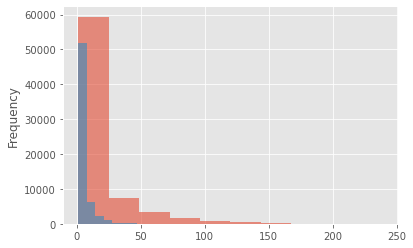

In [47]:
sales.groupby('rest_code')['product_count'].plot.hist(alpha=0.6)

## Ozerniy restaraunt

In [40]:
restOz = sales[sales["rest_code"].str.contains("Озерный")]

In [41]:
restOz.describe(include='all')

,date,product_code,rest_code,product_count,Product_name
count,62163,62163.000000,62163,62163.000000,62163
unique,1818,NaN,1,NaN,107
top,15.11.2012,NaN,Озерный,NaN,Кофе Латте 300мл
freq,45,NaN,62163,NaN,3314
mean,NaN,840371.617795,NaN,4.696685,NaN
std,NaN,29358.049825,NaN,5.677386,NaN
min,NaN,821001.000000,NaN,1.000000,NaN
25%,NaN,822006.000000,NaN,1.000000,NaN
50%,NaN,824074.000000,NaN,3.000000,NaN
75%,NaN,862095.000000,NaN,5.000000,NaN


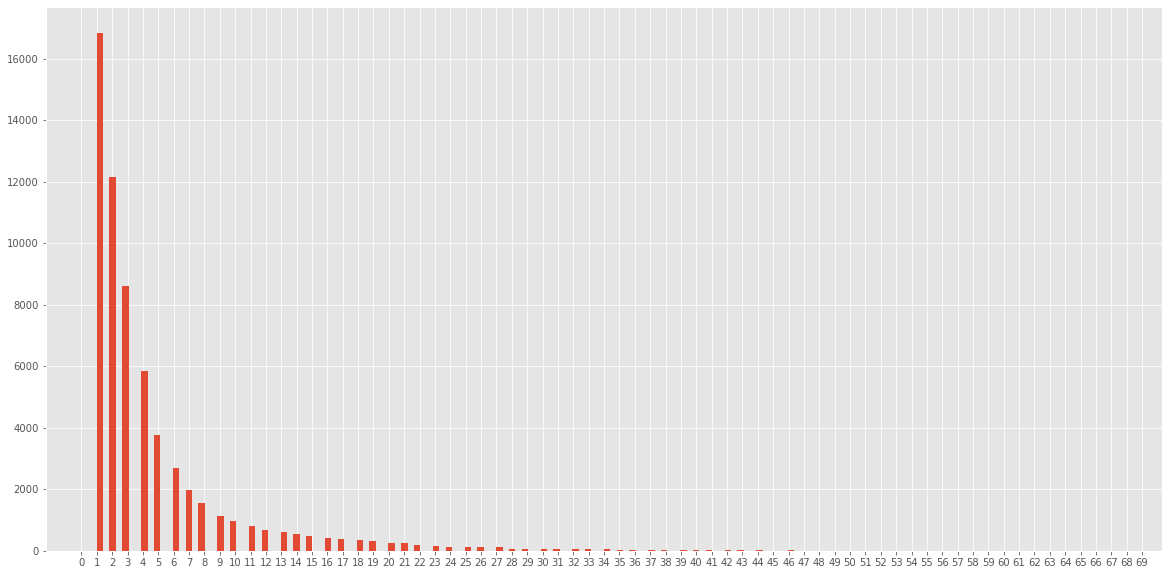

In [42]:
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,70,1))
restOz['product_count'].hist(bins=160);

## Mechta restaraunt

In [43]:
restM = sales[sales["rest_code"].str.contains("Мечта")]

In [44]:
restM.describe(include='all')

,date,product_code,rest_code,product_count,Product_name
count,73381,73381.000000,73381,73381.000000,73381
unique,1659,NaN,1,NaN,106
top,20.09.2012,NaN,Мечта,NaN,Кофе Латте 300мл
freq,61,NaN,73381,NaN,3309
mean,NaN,839345.933620,NaN,17.100503,NaN
std,NaN,28633.973385,NaN,22.620842,NaN
min,NaN,821001.000000,NaN,1.000000,NaN
25%,NaN,822006.000000,NaN,4.000000,NaN
50%,NaN,824074.000000,NaN,9.000000,NaN
75%,NaN,862094.000000,NaN,19.000000,NaN


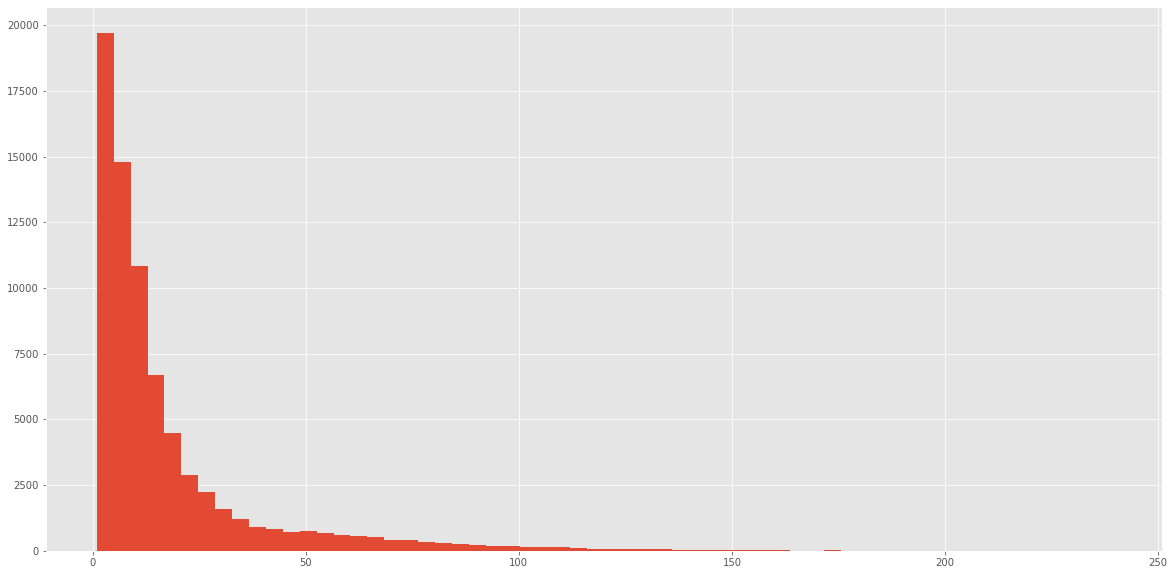

In [45]:
plt.figure(figsize=(20,10))
restM['product_count'].hist(bins=60);